In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
fname1 = 'bank_reviews.csv'
df_bank = pd.read_csv(f'../raw_data/{fname1}', encoding_errors='ignore')

fname2 = 'steam_reviews.csv'
df_steam = pd.read_csv(f'../raw_data/{fname2}', encoding_errors='ignore')

fname3 = 'coursera_by_course_reviews.csv'
df_coursera = pd.read_csv(f'../raw_data/{fname3}', encoding_errors='ignore')

In [99]:
df_steam = df_steam[df_steam['review'].notnull()]
df_coursera = df_coursera[df_coursera['Review'].notnull()]


In [100]:
l2 =['?','!','*','.',',','\"','\'']
count_punctuation = lambda l1: sum([1 for x in l1 if x in l2])

In [101]:
df_bank['n_words'] = df_bank['Reviews'].apply(lambda row: len(row.split()))
df_bank['n_char'] = df_bank['Reviews'].apply(lambda row: len(row))
df_bank['n_punctuation'] = df_bank['Reviews'].apply(count_punctuation)

In [102]:
df_coursera

,CourseId,Review,Label
0,2-speed-it,BOring,1
1,2-speed-it,Bravo !,5
2,2-speed-it,Very goo,5
3,2-speed-it,"Great course - I recommend it for all, especia...",5
4,2-speed-it,One of the most useful course on IT Management!,5
...,...,...,...
140315,zika,Trendy topic with talks from expertises in the...,4
140316,zika,"Wonderful! Simple and clear language, good ins...",5
140317,zika,an interesting and fun course. thanks. dr quincy,5
140318,zika,"very broad perspective, up to date information...",4


In [103]:
df_coursera['n_words'] = df_coursera['Review'].apply(lambda row: len(row.split()))
df_coursera['n_char'] = df_coursera['Review'].apply(lambda row: len(row))
df_coursera['n_punctuation'] = df_coursera['Review'].apply(count_punctuation)

/tmp/ipykernel_18999/3171176131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coursera['n_words'] = df_coursera['Review'].apply(lambda row: len(row.split()))
/tmp/ipykernel_18999/3171176131.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coursera['n_char'] = df_coursera['Review'].apply(lambda row: len(row))
/tmp/ipykernel_18999/3171176131.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [104]:
df_steam['n_words'] = df_steam['review'].apply(lambda row: len(row.split()))

In [105]:
df_bank.loc[500]['Reviews']

"\r\nI never write reviews but had to this time to prevent anyone from making the same mistake as I. That mistake was using North American Savings Bank over other lenders. I started my refinance with this company with the assurance that it would be a standard refinance without any problems and would be completed in a minimal amount of time. Communication with the company was below average after I confirmed that I would be pursuing a loan with them. I had the impression that the loan officer was more interested in attracting more business than helping me. The company uses a convoluted email system that sometimes worked but mostly didn't. This led to frequent emails and phone calls asking for documents to be resent. After having an assessment done on my house and paying for it the communication all but stopped. When I was able to reach the loan officer I was told that I would personally have to find additional comps in my area. I was more than a little annoyed as this is what I was going

In [106]:
df_bank['Reviews'][0]

'Great job, Wyndham Capital! Each person was professional and helped us move through our refinance process smoothly. Thank you!'

<AxesSubplot:xlabel='n_words', ylabel='Count'>

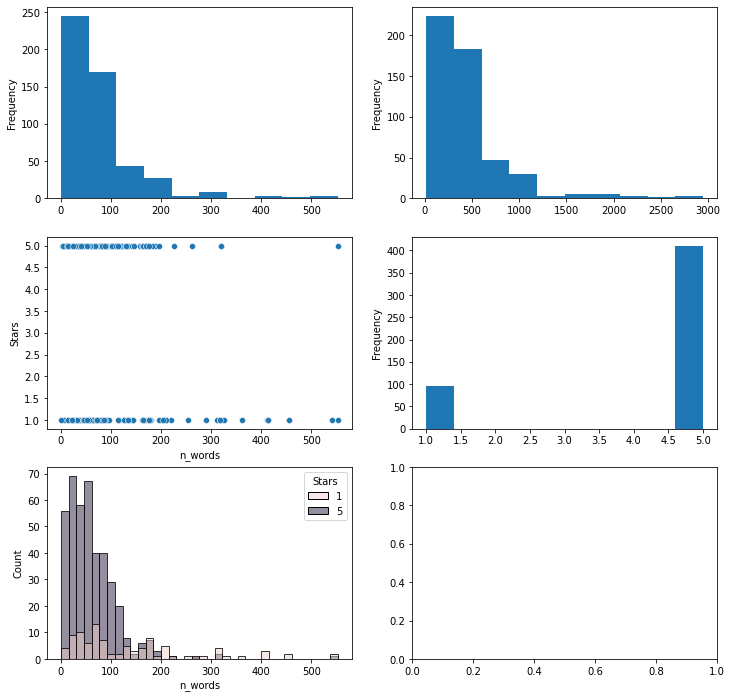

In [107]:
fig, ax = plt.subplots(3,2, figsize = (12,12))
df_bank['n_words'].plot(kind = 'hist', ax = ax[0][0])
df_bank['n_char'].plot(kind = 'hist', ax = ax[0][1])
df_bank['Stars'].plot(kind = 'hist', ax = ax[1][1])
sns.scatterplot(data=df_bank, x='n_words', y='Stars', ax = ax[1][0])

sns.histplot(data=df_bank, x='n_words', hue='Stars', ax = ax[2][0])

<AxesSubplot:xlabel='n_words', ylabel='Count'>

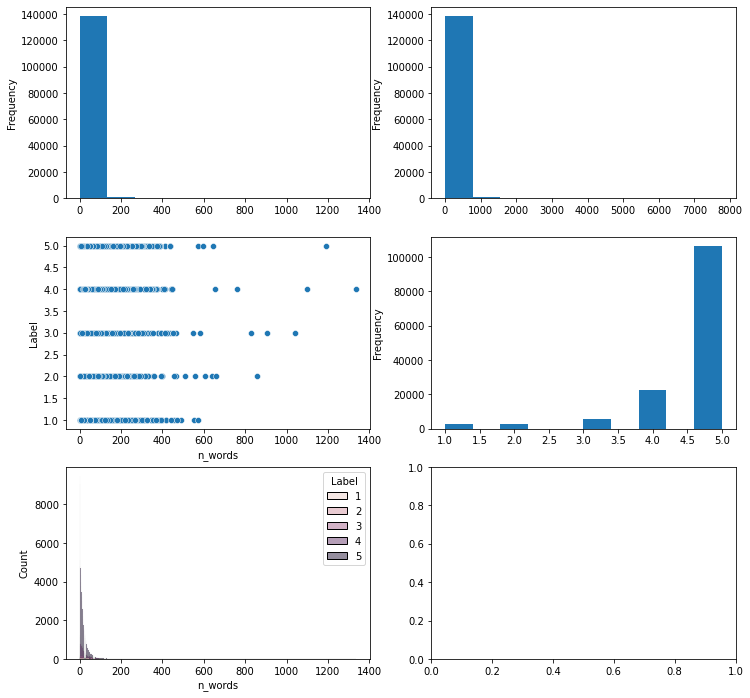

In [108]:
fig, ax = plt.subplots(3,2, figsize = (12,12))
df_coursera['n_words'].plot(kind = 'hist', ax = ax[0][0])
df_coursera['n_char'].plot(kind = 'hist', ax = ax[0][1])
df_coursera['Label'].plot(kind = 'hist', ax = ax[1][1])
sns.scatterplot(data=df_coursera, x='n_words', y='Label', ax = ax[1][0])

sns.histplot(data=df_coursera, x='n_words', hue='Label', ax = ax[2][0])

<AxesSubplot:ylabel='Frequency'>

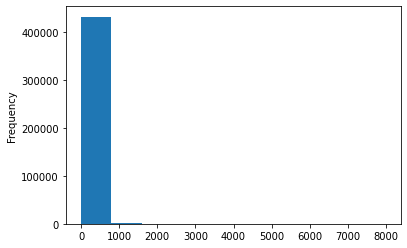

In [34]:
df_steam['n_words'].plot(kind = 'hist')

In [43]:
df_steam['date_posted'] = pd.to_datetime(df_steam['date_posted'], format = '%Y-%m-%d')

/tmp/ipykernel_18999/3158206291.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_steam['date_posted'] = pd.to_datetime(df_steam['date_posted'], format = '%Y-%m-%d')


In [51]:
df_steam['day'] = df_steam['date_posted'].dt.day_of_week

/tmp/ipykernel_18999/1851946926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_steam['day'] = df_steam['date_posted'].dt.day_of_week


<AxesSubplot:xlabel='day', ylabel='Count'>

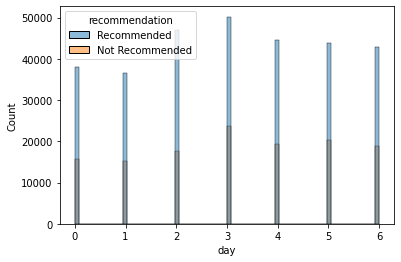

In [57]:
sns.histplot(data=df_steam, x = 'day',hue = 'recommendation')